In [19]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

---

In [20]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
#file_path = Path("CTG3.csv")
file_path = Path("data_preprocessed.csv")
df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,NSP
0,120,0,0,0,0,0,0,73,0.5,43,2.4,2
1,132,4,0,4,2,0,0,17,2.1,0,10.4,1
2,133,2,0,5,2,0,0,16,2.1,0,13.4,1
3,134,2,0,6,2,0,0,16,2.4,0,23.0,1
4,132,4,0,5,0,0,0,16,2.4,0,19.9,1


In [21]:
# Define feature set
# Note most of the columns are not relevant to the required analysis and require removal in order to avoid
# confusing the model
#X = df[["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]]
X = df[["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV", "ALTV", "MLTV"]]

X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
0,120,0,0,0,0,0,0,73,0.5,43,2.4
1,132,4,0,4,2,0,0,17,2.1,0,10.4
2,133,2,0,5,2,0,0,16,2.1,0,13.4
3,134,2,0,6,2,0,0,16,2.4,0,23.0
4,132,4,0,5,0,0,0,16,2.4,0,19.9


In [22]:
# Define target vector
y = df["NSP"].ravel()
y[:5]

array([2, 1, 1, 1, 1])

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [23]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape

(1593, 11)

In [24]:
# Create StandardScaler instance
scaler = StandardScaler()

In [25]:
# Fit standard scaler
X_scaler = scaler.fit(X_train)

In [26]:
# scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Create a random classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [28]:
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [29]:
# make predictions
predictions = rf_model.predict(X_test_scaled)

In [30]:
# Model evaluation
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"]
)

acc_score = accuracy_score(y_test, predictions)

In [31]:
# Displaying results
print("Confusion Matrix")
display(cm_df)

print(f"Accuracy Score: {acc_score}")
print("Classification Report")

target_names = ["State 0: Normal", "State 1: Suspicious", "State 2: Pathologic"]
print(classification_report(y_test, predictions, target_names=target_names))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2
Actual 0,409,4,0
Actual 1,21,51,2
Actual 2,4,0,40


Accuracy Score: 0.9416195856873822
Classification Report
                     precision    recall  f1-score   support

    State 0: Normal       0.94      0.99      0.97       413
State 1: Suspicious       0.93      0.69      0.79        74
State 2: Pathologic       0.95      0.91      0.93        44

           accuracy                           0.94       531
          macro avg       0.94      0.86      0.90       531
       weighted avg       0.94      0.94      0.94       531



In [32]:
# Feature importance
importance = rf_model.feature_importances_

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.19940161714701252, 'ASTV'),
 (0.1698261550619931, 'ALTV'),
 (0.1546154148296223, 'MSTV'),
 (0.1106188297294458, 'MLTV'),
 (0.10356062448742849, 'DP'),
 (0.0803820003063365, 'LB'),
 (0.06331992178386196, 'AC'),
 (0.05487056901451494, 'UC'),
 (0.036480142861059335, 'FM'),
 (0.023175684009214284, 'DL'),
 (0.003749040769510842, 'DS')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

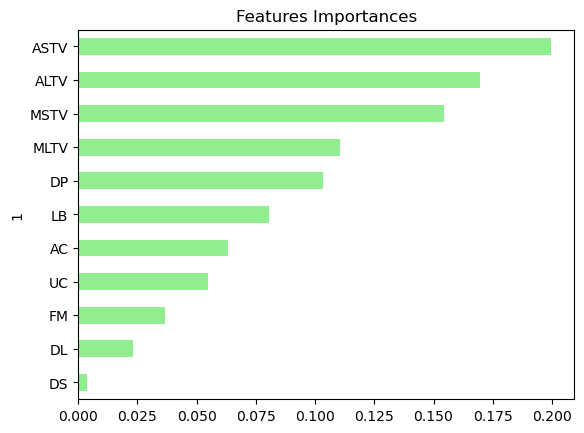

In [33]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [34]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

# Addit - score the model
print(f"Training data score: {classifier.score(X_train, y_train)}")
print(f"Testing data score: {classifier.score(X_test, y_test)}")

Training data score: 0.8782172002510985
Testing data score: 0.847457627118644


/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [35]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.tail(10)

,Prediction,Actual
521,1,1
522,1,2
523,1,1
524,1,1
525,1,1
526,2,2
527,1,1
528,1,1
529,1,1
530,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [36]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.847457627118644

In [37]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[384,  22,   7],
       [ 34,  37,   3],
       [  4,  11,  29]])

In [38]:
# Print the classification report for the model
target_names = ["State 0: Normal", "State 1: Suspicious", "State 2: Pathologic"]
print(classification_report(y_test, predictions, target_names=target_names))

                     precision    recall  f1-score   support

    State 0: Normal       0.91      0.93      0.92       413
State 1: Suspicious       0.53      0.50      0.51        74
State 2: Pathologic       0.74      0.66      0.70        44

           accuracy                           0.85       531
          macro avg       0.73      0.70      0.71       531
       weighted avg       0.84      0.85      0.84       531

